# RSA Example with MNE Sample Data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from eelbrain import *

Import distance and correlation functions
- `pdist` takes a list of vectors and computes pairwise distances
- `squareform` alternates between triangle and full matrix

In [2]:
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

Load MNE sample data

In [4]:
ds = datasets.get_mne_sample(src='ico', sub="modality=='A'")
ds.head()

trigger   i_start   index   condition   side   modality
-------------------------------------------------------
2         6994      0       RA          R      A       
1         7192      2       LA          L      A       
2         7413      4       RA          R      A       
1         7612      6       LA          L      A       
2         7810      8       RA          R      A       
1         8025      10      LA          L      A       
2         8233      12      RA          R      A       
1         8428      14      LA          L      A       
2         8633      16      RA          R      A       
1         8857      19      LA          L      A       

Code modality (AUDIO / VISUAL) as 1s and 0s

In [5]:
variable = ds['side']
model = variable.as_dummy
print model[:10]

[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]


Make model RDM

In [6]:
model_rdm = pdist(model, 'euclidean')
print model_rdm
print model_rdm.shape

[ 1.  0.  1. ...,  1.  0.  1.]
(10440,)


Visualize model RDM

/Users/linglab/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


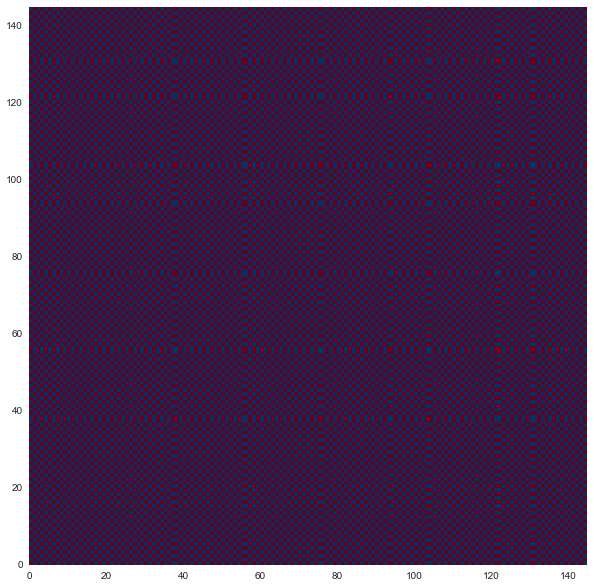

In [7]:
model_rdm_sq = squareform(model_rdm)
plt.figure(figsize=(10, 10))
plt.pcolor(model_rdm_sq, cmap="RdBu")
plt.xlim(0, ds.n_cases)
plt.ylim(0, ds.n_cases)
plt.show()

Get data from 3 ROIs

In [17]:
src = ds['src']
data = {}
data['STG'] = src.sub(source='superiortemporal-lh').x
data['IFG'] = src.sub(source='parsopercularis-lh').x
data['Occ'] = src.sub(source='lateraloccipital-lh').x

N = ds.n_cases # number of items
N_times = src.time.times.shape[0] # number of timepoints
for i, j in data.items():
    print i, j.shape

Occ (145, 88, 76)
STG (145, 98, 76)
IFG (145, 50, 76)


In [18]:
rhos = {'STG': [], 'IFG': [], 'Occ': []}

In [19]:
for region, d in data.items():
    for i in range(N_times)[4:-4]:
        # get all sources and +/- 4 time points
        data_window = d[:,:,i-4:i+5]
        # flatten
        data_window = data_window.reshape(N, -1)
        # make data RDM
        data_rdm = pdist(data_window, 'correlation')
        # calculate model-data correspondence
        rho = spearmanr(model_rdm, data_rdm)[0]
        rhos[region].append(rho)

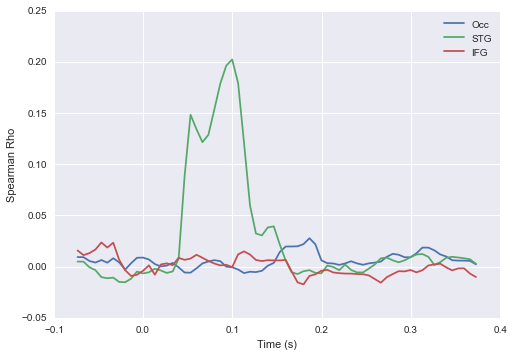

In [20]:
for region, corrs in rhos.items():
    plt.plot(src.time.times[4:-4], corrs, label=region)
plt.legend()
plt.ylabel("Spearman Rho")
plt.xlabel("Time (s)")
sns.despine()

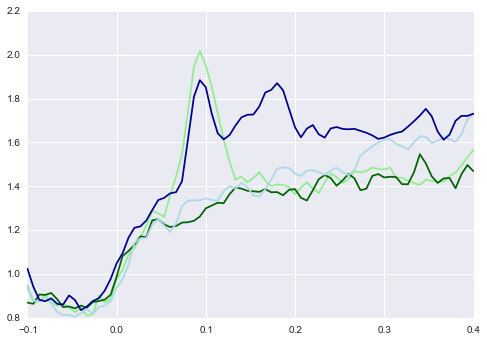

In [51]:
aud_idx = model.flatten() == 1
vis_idx = model.flatten() == 0
aud_stg = data['STG'][aud_idx].mean(0).mean(0)
vis_stg = data['STG'][vis_idx].mean(0).mean(0)
aud_occ = data['Occ'][aud_idx].mean(0).mean(0)
vis_occ = data['Occ'][vis_idx].mean(0).mean(0)
plt.plot(src.time.times, aud_stg, 'lightgreen')
plt.plot(src.time.times, vis_stg, 'darkgreen')
plt.plot(src.time.times, aud_occ, 'lightblue')
plt.plot(src.time.times, vis_occ, 'darkblue')

In [57]:
cond = np.array(ds['condition'].as_labels())
la_idx = cond=='LA'
ra_idx = cond=='RA'

In [58]:
aud_stg = data['STG'][aud_idx].mean(0).mean(0)
vis_stg = data['STG'][vis_idx].mean(0).mean(0)

array([False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,  True], dtype=bool)